 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
import pandas as pd
from pathlib import Path

%matplotlib inline

In [3]:
# Reading whale returns
csv_path = Path("Resources/Whale_Returns.csv")
whale_returns_df = pd.read_csv(csv_path,index_col = "Date",parse_dates = True, infer_datetime_format = True)
whale_returns_df





,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

In [6]:
!pwd

/c/Users/16477/Downloads/Starter_Code (2)/Starter_Code/A-whale-off-the-portfolio-Homework-


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns

csv_path = Path("Resources/Algo_Returns.csv")
algo_returns_df = pd.read_csv(csv_path, index_col = "Date",parse_dates = True, infer_datetime_format = True)
algo_returns_df


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path("resources/Sp_Tsx_History.csv")
sp_tsx_history_df = pd.read_csv(csv_path, index_col = "Date",parse_dates = True, infer_datetime_format = True)
sp_tsx_history_top_changes = sp_tsx_history_df.sort_values("Close")




In [11]:
sp_tsx_history_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# Reading whale returns

csv_path = Path("Resources/Whale_Returns.csv")
whale_returns_df = pd.read_csv(csv_path,index_col = "Date",parse_dates = True, infer_datetime_format = True)
whale_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [13]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data types
sp_tsx_history_df.astype

<bound method NDFrame.astype of                  Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99
...                ...
2019-12-20  $17,118.44
2019-12-23  $17,128.71
2019-12-24  $17,180.15
2019-12-27  $17,168.21
2019-12-30  $17,098.56

[1818 rows x 1 columns]>

In [15]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",","")

In [16]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$","")

C:\Users\16477\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [17]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")

In [18]:
# Calculate Daily Returns
daily_returns = sp_tsx_history_df.pct_change()
daily_returns.head()
daily_returns["sp_tsx_returns"] = daily_returns["Close"]
daily_returns = daily_returns["sp_tsx_returns"]
daily_returns

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: sp_tsx_returns, Length: 1818, dtype: float64

In [19]:
# Drop nulls
sp_tsx_history_df.isnull().mean() * 100
sp_tsx_history_df.isnull().sum()



Close    0
dtype: int64

In [20]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_history_df = sp_tsx_history_df.rename(columns = {"Close":"S&P TSX 60"})
sp_tsx_history_df.sort_index(ascending=True)

,S&P TSX 60
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Join UK, France, and Netherlands full datasets by axis
joined_data_rows = pd.concat(
    [whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner"
)
joined_data_rows



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

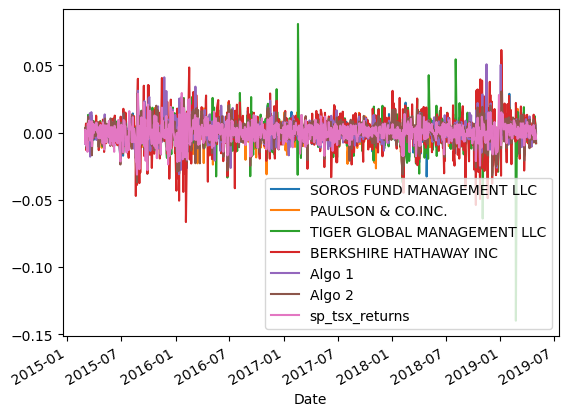

In [22]:
# Plot daily returns of all portfolios
joined_data_rows.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

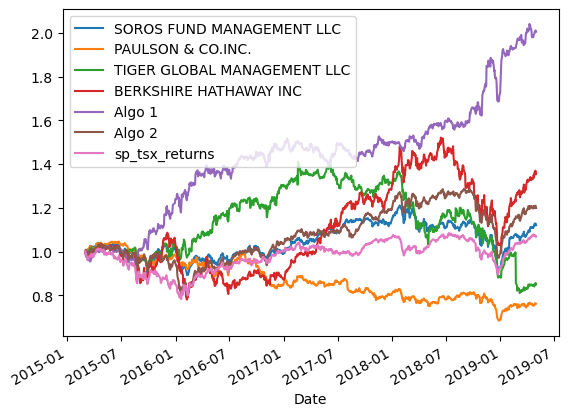

In [23]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_rows).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

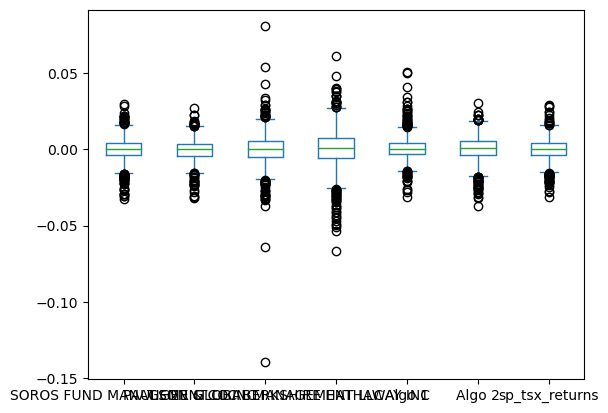

In [24]:
# Box plot to visually show risk
joined_data_rows.plot.box()

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_rows.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007590
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [26]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns_std =joined_data_rows[["sp_tsx_returns"]].std()
sp_tsx_returns_std
# Determine which portfolios are riskier than the S&P TSX 60
print("SOROS FUND, TIGER GLOBAL MANAGEMENT, BEKSHIRE HATHWAY, ALGO are riskier than S&P TSX 60")

SOROS FUND, TIGER GLOBAL MANAGEMENT, BEKSHIRE HATHWAY, ALGO are riskier than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_rows * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.129501,0.050799,0.030958
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

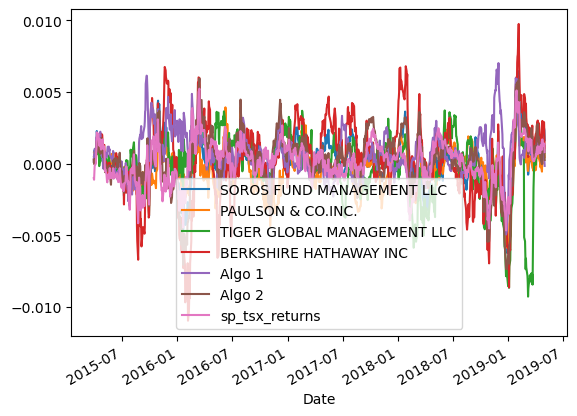

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
joined_data_rows.rolling(window=21).mean().plot()

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation = joined_data_rows.corr()
correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
sp_tsx_returns,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio
covariance = joined_data_rows["Algo 2"].rolling(window=60).cov(joined_data_rows['sp_tsx_returns'])
covariance

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1030, dtype: float64

In [31]:
# Calculate variance of S&P TSX
variance = joined_data_rows["sp_tsx_returns"].var()
variance

4.9434802530161176e-05

In [32]:
# Computing beta
sp_tsx_beta = covariance / variance
sp_tsx_beta

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.308203
2019-04-26    0.308860
2019-04-29    0.300939
2019-04-30    0.304223
2019-05-01    0.310053
Length: 1030, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of sp_tsx_returns'}, xlabel='Date'>

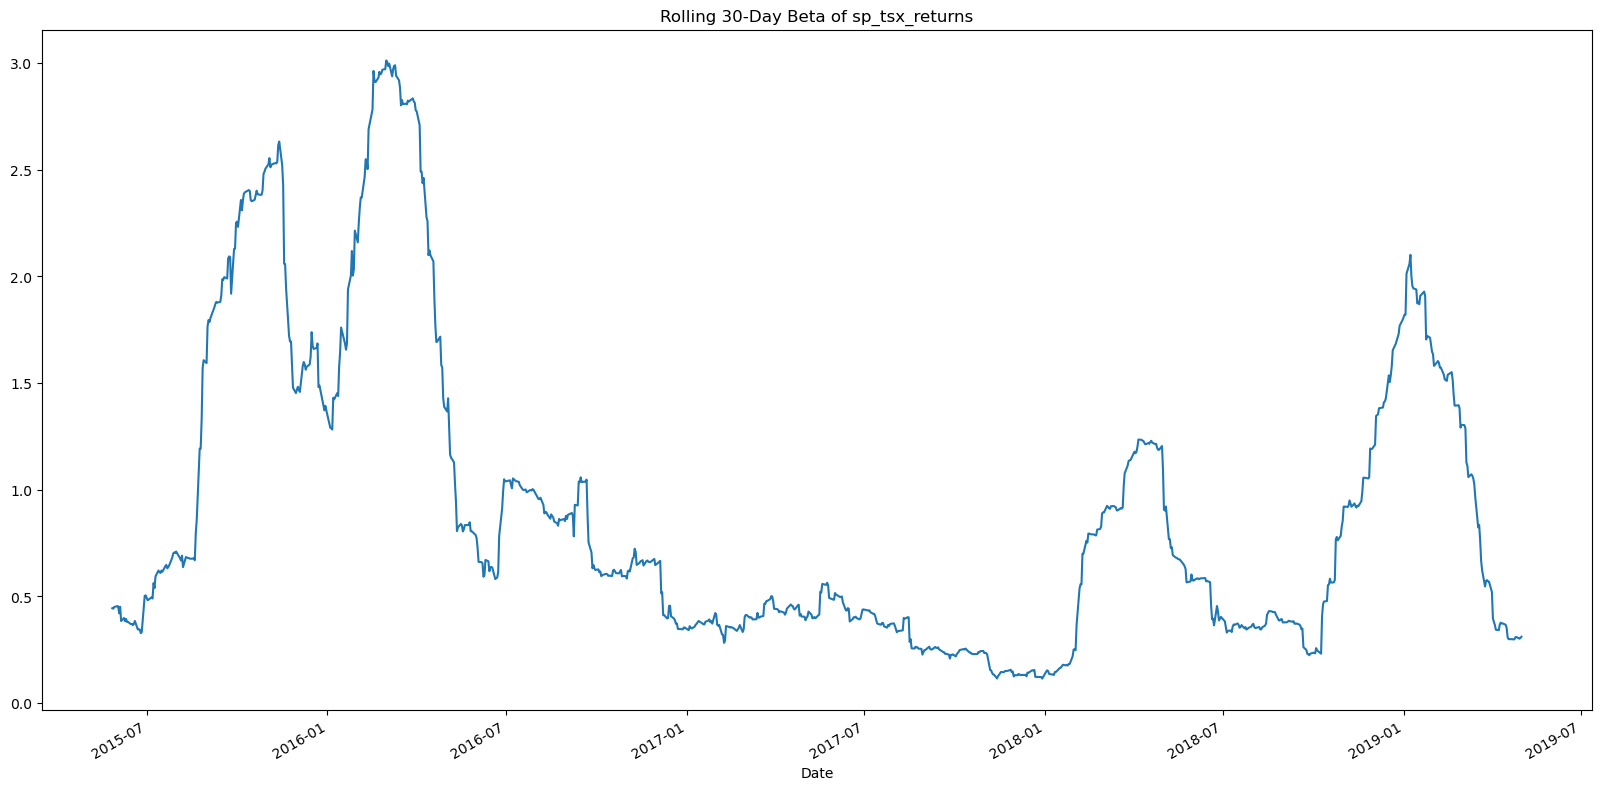

In [33]:
# Plot beta trend
sp_tsx_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of sp_tsx_returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

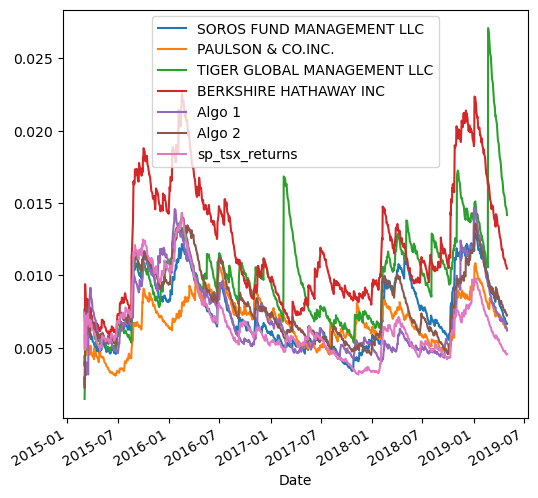

In [34]:
# Use `ewm` to calculate the rolling window
joined_data_rows.ewm(halflife=21).std().plot(figsize=(6,6))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data_rows.mean() * 252) / (joined_data_rows.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
sp_tsx_returns                 0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

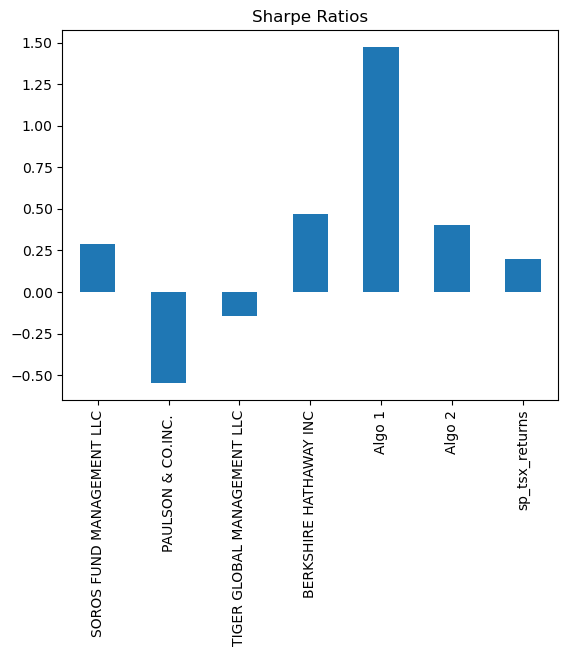

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes it does

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
csv_path = Path("Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(csv_path,index_col = "Date",parse_dates = True, infer_datetime_format = True)
shop_historical_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [38]:
# Reading data from 2nd stock
csv_path = Path("Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(csv_path,index_col = "Date",parse_dates = True, infer_datetime_format = True)
otex_historical_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [39]:
# Reading data from 3rd stock
csv_path = Path("Resources/l_historical.csv")
l_historical_df = pd.read_csv(csv_path,index_col = "Date",parse_dates = True, infer_datetime_format = True)
l_historical_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [40]:
# Combine all stocks in a single DataFrame
combined_data_rows = pd.concat(
    [shop_historical_df, otex_historical_df, l_historical_df], axis="rows", join="inner"
)
combined_data_rows

# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Join UK, France, and Netherlands full datasets by axis


,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [41]:
# Reset Date index
combined_data_rows = combined_data_rows.reset_index() 
combined_data_rows.head()

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51


In [42]:
# Reorganize portfolio data by having a column per symbol
portfolio_data = combined_data_rows.pivot_table(values="Close", index="Date", columns="Symbol")
portfolio_data


Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [43]:
# Calculate daily returns
daily_returns = portfolio_data.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns.sample()

Symbol,L,OTEX,SHOP
Date,,,
2019-03-13,-0.001538,-0.00747,0.010572


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame

joint_returns = pd.concat(
    [portfolio_returns, joined_data_rows], axis="columns", join="inner"
)
joint_returns["end"]=joint_returns[0]
joint_returns = joint_returns.drop(columns=[0])
joint_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns,end
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joint_returns = joint_returns.dropna()
joint_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns,end
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annualized_std = joint_returns * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns,end
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008964
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.071707
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049627
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015830
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015853


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

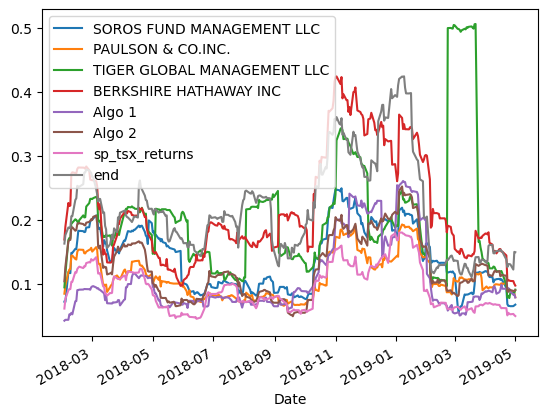

In [48]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
annualized_std.rolling(window=21).std().plot()

### Calculate and plot the correlation

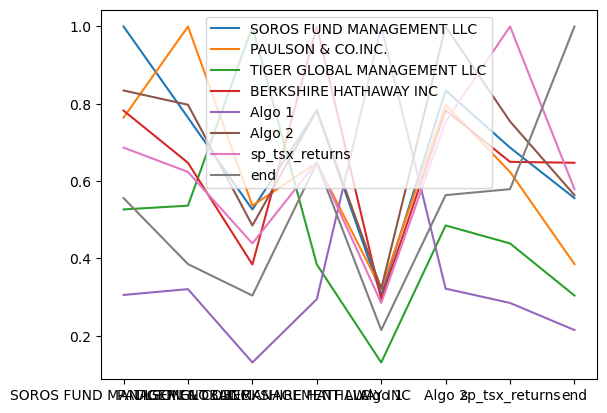

In [49]:
# Calculate and plot the correlation
price_correlation = annualized_std.corr().plot()


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

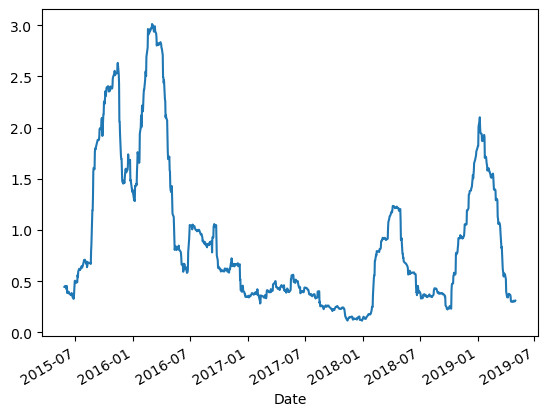

In [50]:
# Calculate and plot Beta
annualized_std_beta = covariance / variance
annualized_std_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (annualized_std.mean() * 252) / (annualized_std.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
sp_tsx_returns                 0.034651
end                            1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

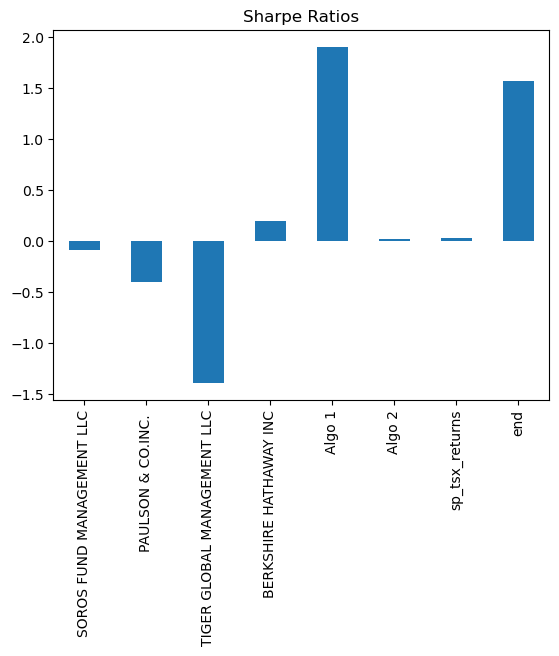

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

the funds that wr doing better did even better and those not doing well went worse